In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [137]:
df = pd.read_csv('movies_initial.csv')
df

imdbID                                   title  year     rating  \
0            1                              Carmencita  1894  NOT RATED   
1            5                        Blacksmith Scene  1893    UNRATED   
2            3                          Pauvre Pierrot  1892        NaN   
3            8  Edison Kinetoscopic Record of a Sneeze  1894        NaN   
4           10   Employees Leaving the Lumi�re Factory  1895        NaN   
...        ...                                     ...   ...        ...   
46009  5005684                       The New Classmate  2015        NaN   
46010  5013056      Untitled Christopher Nolan Project  2017        NaN   
46011  5013980                  Die Turnschuh-Giganten  2016        NaN   
46012  5016760                The Monster of Mangatiti  2015        NaN   
46013  5023260                           The Last Word  2016        NaN   

      runtime                     genre    released              director  \
0       1 min        Documentary, Short         NaN  William K.L. Dickson   
1       1 min                     Short  1893-05-09  William K.L. Dickson   
2       4 min  Animation, Comedy, Short  1892-10-28         �mile Reynaud   
3       1 min        Documentary, Short  1894-01-09  William K.L. Dickson   
4       1 min        Documentary, Short  1895-03-22         Louis Lumi�re   
...       ...                       ...         ...                   ...   
46009     NaN             Drama, Family  2015-10-11   Ashwiny Iyer Tiwari   
46010     NaN                    Sci-Fi  2017-07-21     Christopher Nolan   
46011     NaN     Biography, Drama, War         NaN      Oliver Dommenget   
46012     NaN                       NaN  2015-09-06                   NaN   
46013     NaN                    Comedy         NaN       Mark Pellington   

                                                  writer  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
46009                                                NaN   
46010  Christopher Nolan (screenplay), Christopher Nolan   
46011                                 Christian Schnalke   
46012                                         John Banas   
46013                                                NaN   

                                                    cast  ...  imdbRating  \
0                                             Carmencita  ...         5.9   
1                               Charles Kayser, John Ott  ...         6.2   
2                                                    NaN  ...         6.7   
3                                               Fred Ott  ...         5.9   
4                                                    NaN  ...         6.9   
...                                                  ...  ...         ...   
46009       Swara Bhaskar, Ratna Pathak, Pankaj Tripathy  ...         NaN   
46010                                                NaN  ...         NaN   
46011  Ken Duken, Florian Bartholom�i, Torben Liebrec...  ...         NaN   
46012  Greta Gregory, Mark Mitchinson, Flynn Allan, H...  ...         NaN   
46013                                    Amanda Seyfried  ...         NaN   

       imdbVotes                                             poster  \
0         1032.0  https://m.media-amazon.com/images/M/MV5BMjAzND...   
1         1189.0                                                NaN   
2          566.0                                                NaN   
3          988.0                                                NaN   
4         3469.0                                                NaN   
...          ...                                                ...   
46009        NaN                       

In [138]:
df.describe()

imdbID   metacritic    imdbRating     imdbVotes
count  4.601400e+04  9401.000000  44300.000000  4.429900e+04
mean   8.552062e+05    56.896288      6.381454  1.180055e+04
std    1.141979e+06    17.715373      1.183113  4.934499e+04
min    1.000000e+00     1.000000      1.100000  5.000000e+00
25%    8.165750e+04    45.000000      5.800000  3.260000e+02
50%    2.524875e+05    58.000000      6.600000  9.990000e+02
75%    1.370868e+06    70.000000      7.200000  3.829000e+03
max    5.023260e+06   100.000000      9.600000  1.521105e+06

In [139]:
df.dtypes

imdbID           int64
title           object
year            object
rating          object
runtime         object
genre           object
released        object
director        object
writer          object
cast            object
metacritic     float64
imdbRating     float64
imdbVotes      float64
poster          object
plot            object
fullplot        object
language        object
country         object
awards          object
lastupdated     object
type            object
dtype: object

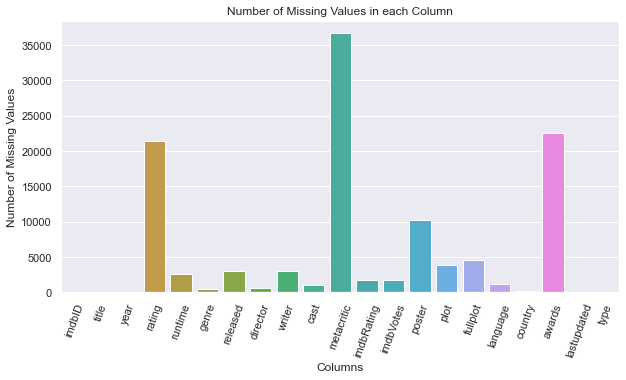

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
missing_vals = df.isnull().sum()
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x=missing_vals.index, y=missing_vals.values)
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Number of Missing Values in each Column')
for item in ax.get_xticklabels():
    item.set_rotation(70)

plt.show()


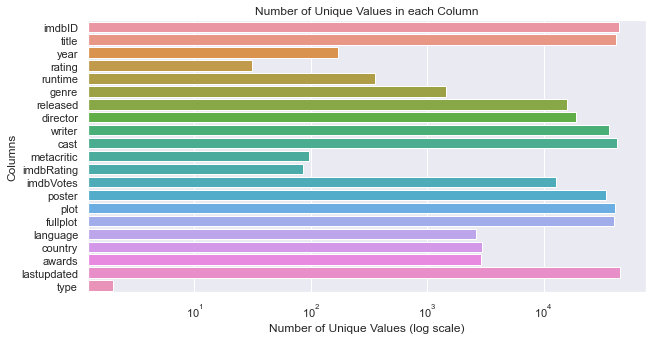

In [141]:
unique_vals = df.nunique()
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x=unique_vals.values, y=unique_vals.index, orient='horizontal')
ax.set_xscale('log')
plt.ylabel('Columns')
plt.xlabel('Number of Unique Values (log scale)')
plt.title('Number of Unique Values in each Column')

plt.show()

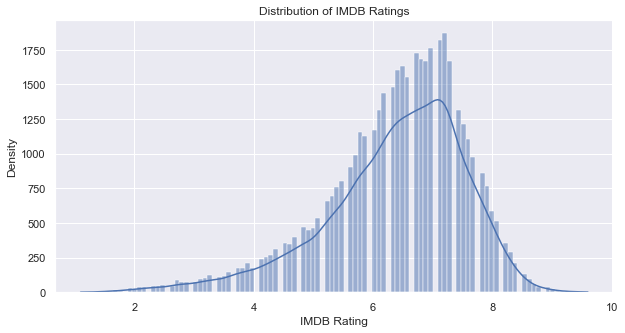

In [142]:
df_filt = df[df['imdbRating'].notnull()]

# Create a figure with a larger width
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the distribution of the 'imdb_rating' column
sns.histplot(data=df_filt, x="imdbRating", kde=True, ax=ax)

# Add labels and title to the plot
plt.xlabel('IMDB Rating')
plt.ylabel('Density')
plt.title('Distribution of IMDB Ratings')
plt.show()

In [143]:
value_counts = df['imdbRating'].value_counts().sort_index()
value_counts

1.1     1
1.2     2
1.3     1
1.4     2
1.5     9
       ..
9.2    11
9.3     4
9.4     5
9.5     4
9.6     1
Name: imdbRating, Length: 86, dtype: int64

In [144]:
genre_value_counts = df['genre'].value_counts()
genre_value_counts = genre_value_counts.sort_values(ascending=False)
genre_value_counts.head(10)

Drama                     5455
Comedy                    3275
Documentary               2047
Comedy, Drama             1643
Drama, Romance            1392
Comedy, Romance           1065
Comedy, Drama, Romance    1053
Horror                     931
Crime, Drama               626
Drama, Thriller            602
Name: genre, dtype: int64

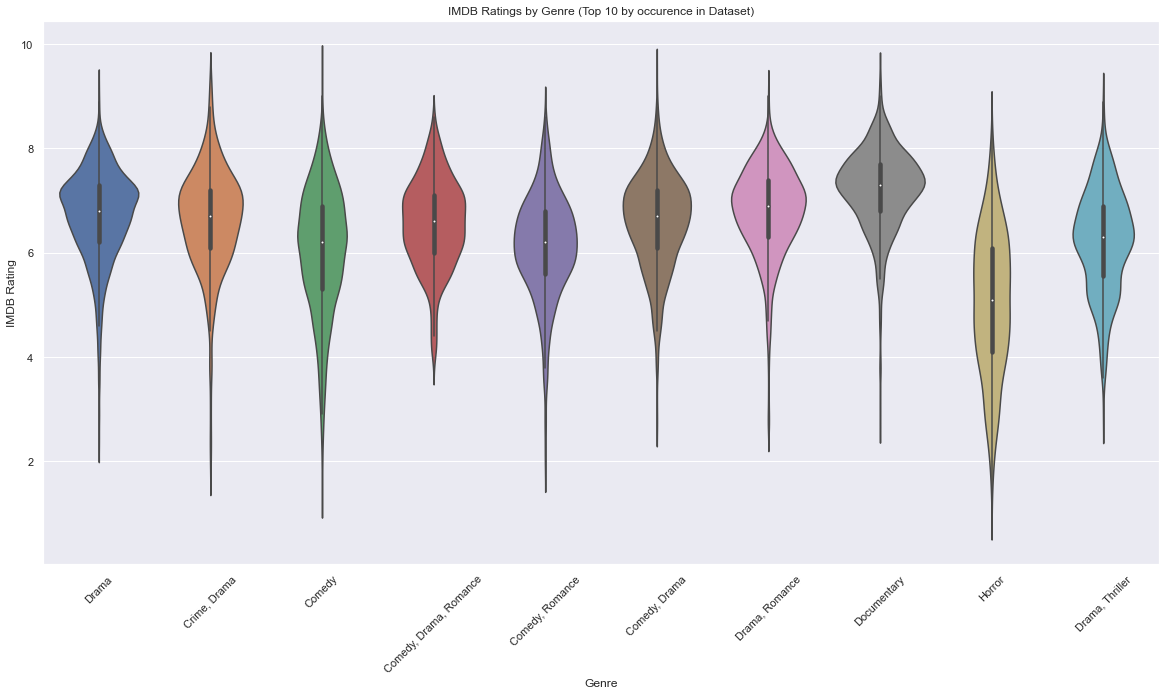

In [145]:
value_counts = df['genre'].value_counts()
top_genres = value_counts.head(10).index.tolist()
df_top_genres = df[df['genre'].isin(top_genres)]
fig, ax = plt.subplots(figsize=(20, 10))
sns.violinplot(x="genre", y="imdbRating", data=df_top_genres, ax=ax, showmedians=True)
plt.xlabel('Genre')
plt.ylabel('IMDB Rating')
plt.title('IMDB Ratings by Genre (Top 10 by occurence in Dataset)')
for item in ax.get_xticklabels():
    item.set_rotation(45)
plt.show()

In [146]:
for index, row in df.iterrows():
    df.at[index, "year"] = df.at[index, "year"][0:4]
df["year"]=df["year"].astype("int")

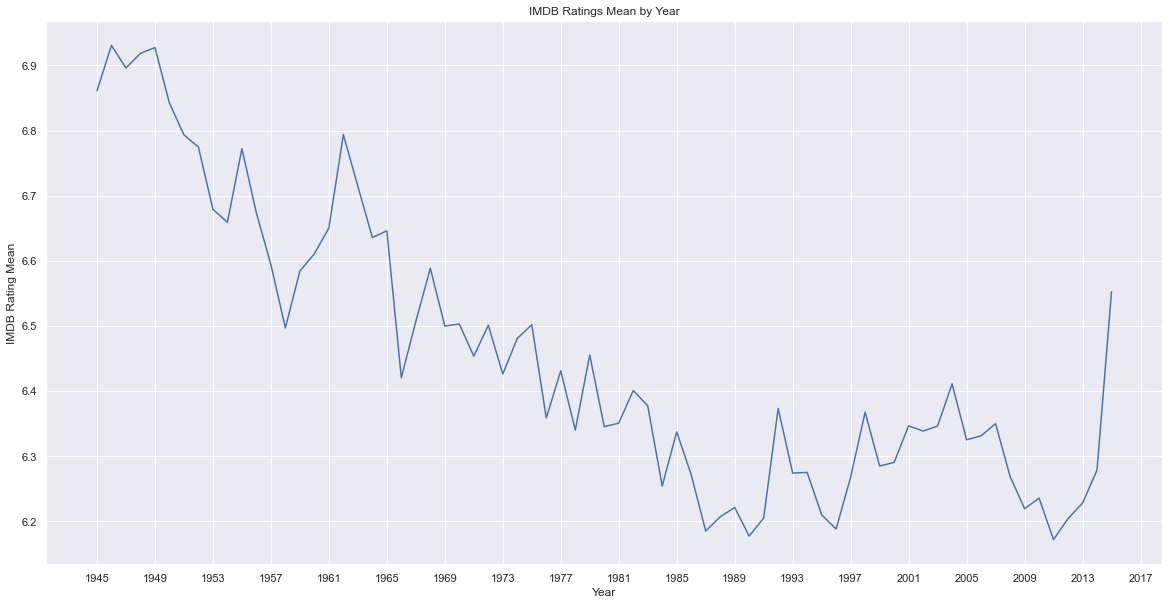

In [147]:
df_mean = df[df['imdbRating'].notna()]
df_mean = df_mean.where(df_mean["year"]>=1945)
df_mean = df_mean.where(df_mean["year"]<=2016)
df_mean = df_mean.groupby('year')['imdbRating'].mean().reset_index()
# Create the line plot
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x="year", y="imdbRating", data=df_mean, ax=ax)

# Add labels
plt.xlabel('Year')
plt.ylabel('IMDB Rating Mean')
plt.title('IMDB Ratings Mean by Year')
xticks = range(int(df_mean['year'].min()), int(df_mean['year'].max()) + 5, 4)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
plt.show()


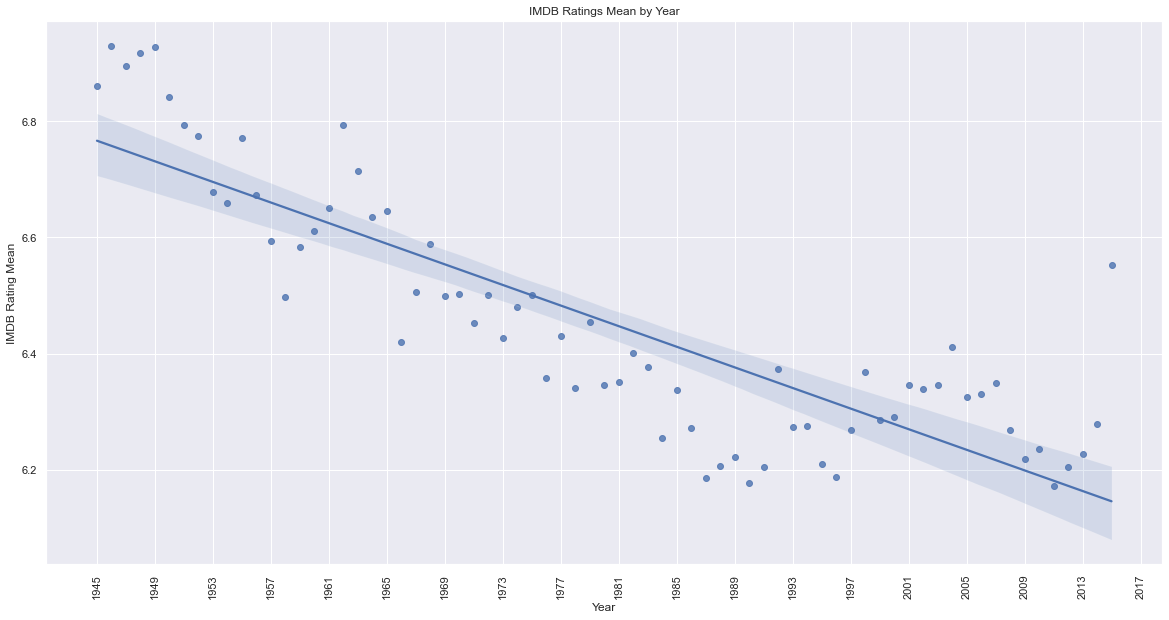

In [148]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.regplot(x="year", y="imdbRating", data=df_mean, ax=ax)
plt.xlabel('Year')
plt.ylabel('IMDB Rating Mean')
plt.title('IMDB Ratings Mean by Year')
xticks = range(int(df_mean['year'].min()), int(df_mean['year'].max()) + 5, 4)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.show()

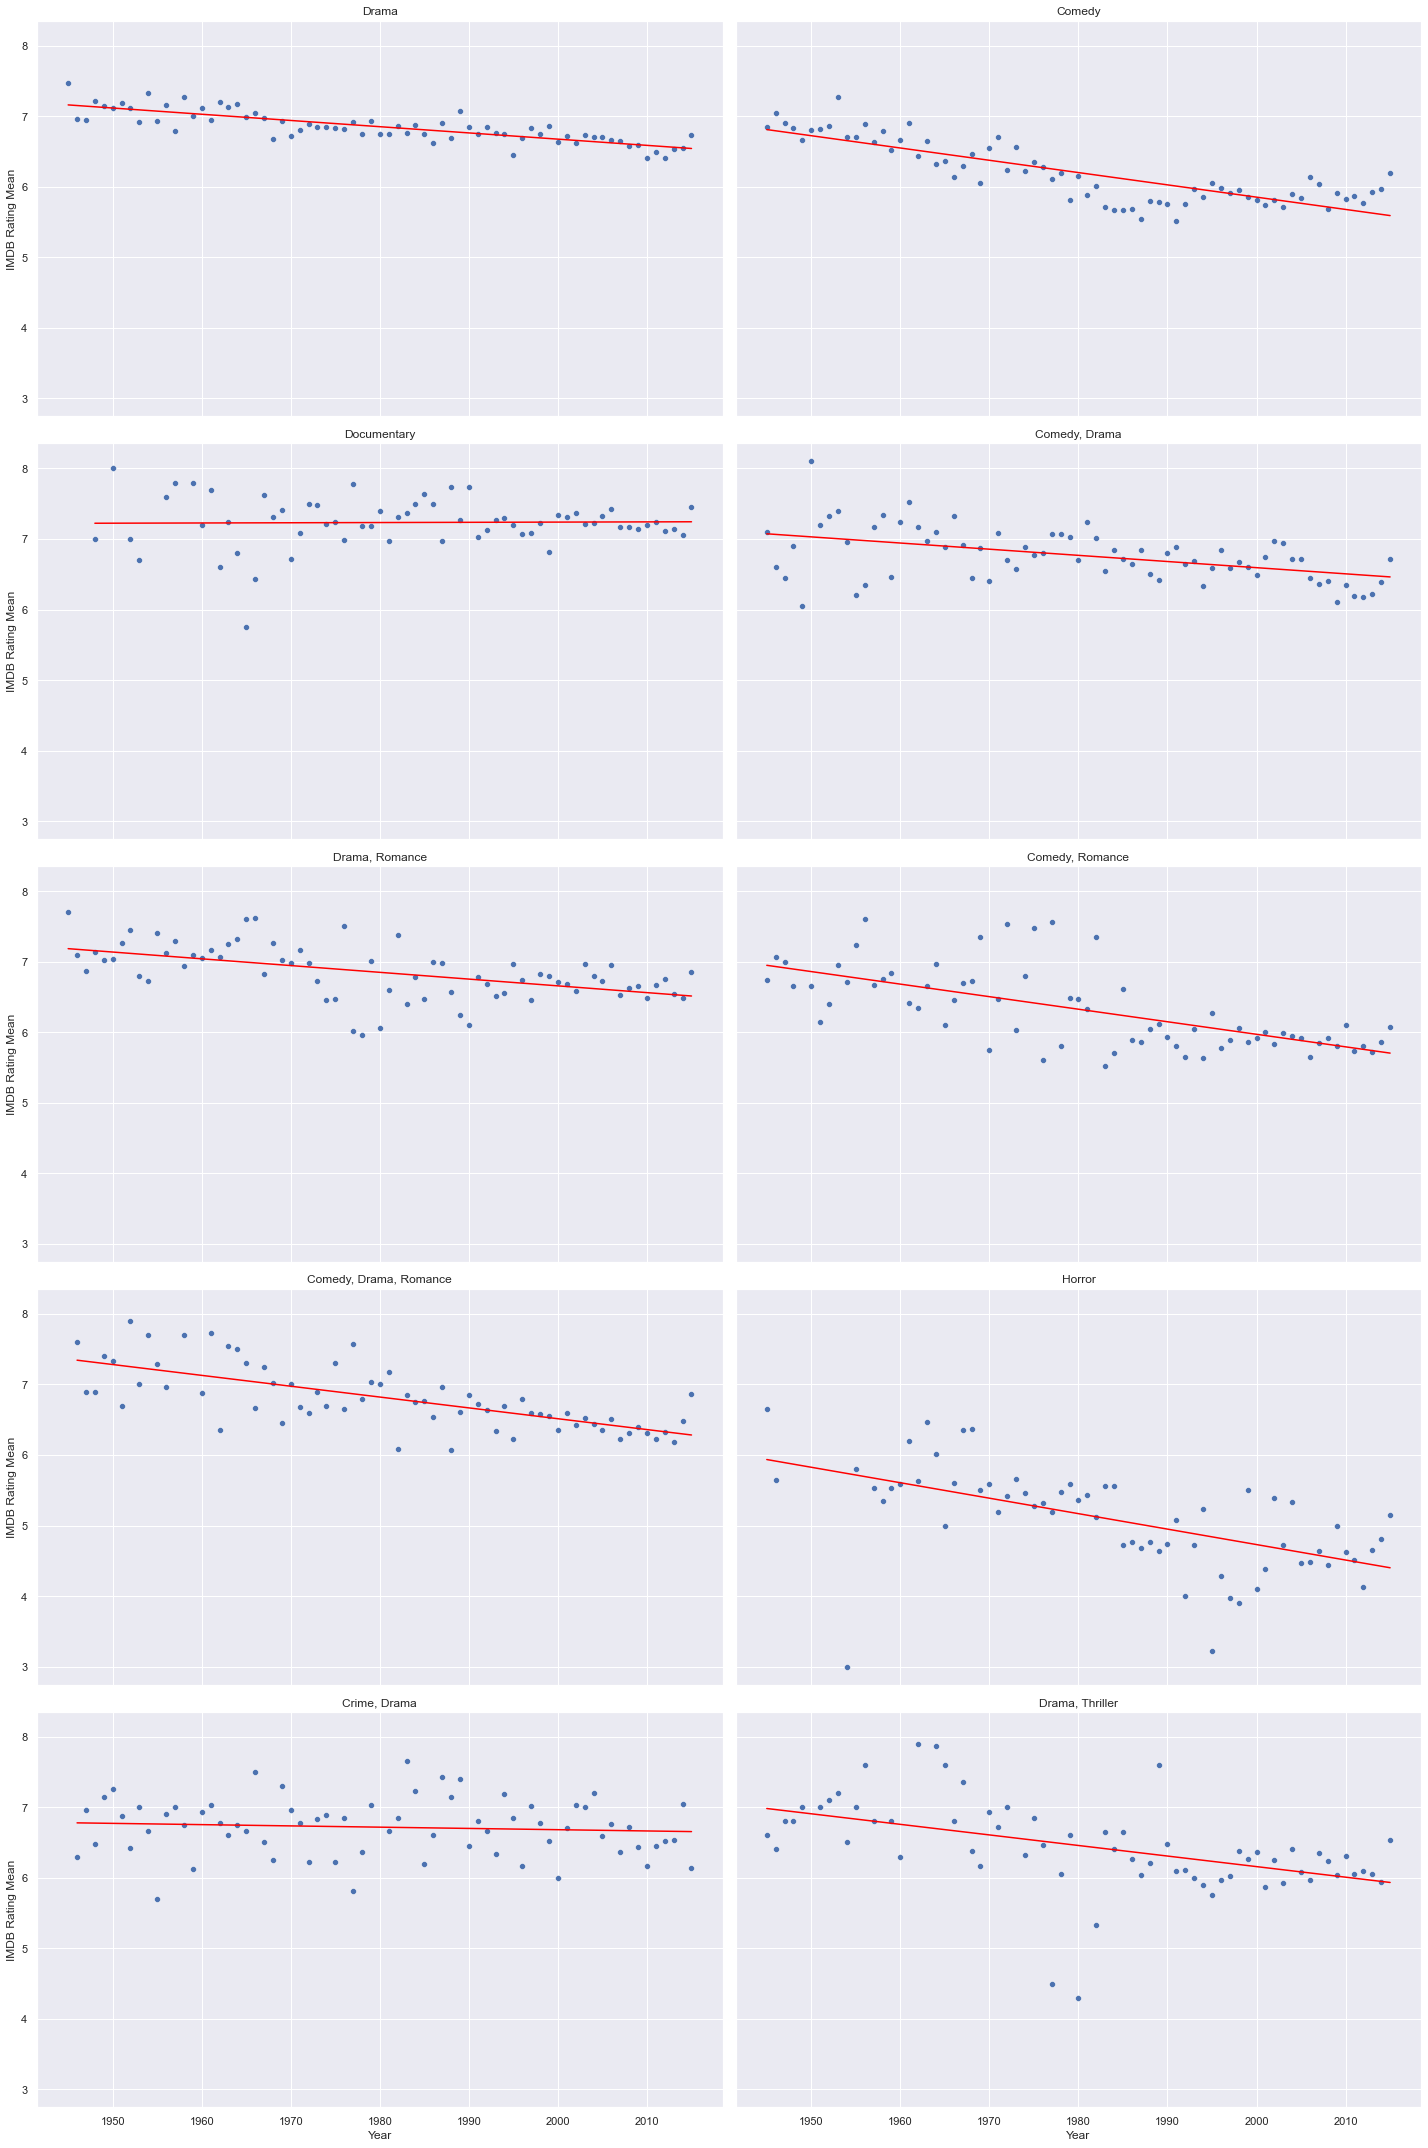

In [149]:
import scipy

genre_counts = df["genre"].value_counts().head(10)
genres = genre_counts.index.tolist()

fig, ax = plt.subplots(5, 2, figsize=(20, 30), sharex=True, sharey=True)
ax = ax.flatten()
for i, genre in enumerate(genres):
    df_genre = df[df["genre"] == genre]
    df_mean = df_genre[df_genre['imdbRating'].notna()]
    df_mean = df_mean.where(df_mean["year"]>=1945)
    df_mean = df_mean.where(df_mean["year"]<=2016)
    df_mean = df_mean.groupby('year')['imdbRating'].mean().reset_index()
    sns.scatterplot(x="year", y="imdbRating", data=df_mean, ax=ax[i])
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df_mean["year"], df_mean["imdbRating"])
    x = df_mean["year"]
    y = slope * x + intercept
    ax[i].plot(x, y, color="red")

    ax[i].set_title(genre)
    if i == 8 or i == 9:
        ax[i].set_xlabel("Year")
    if i == 0 or i == 2 or i == 4 or i == 6 or i == 8:
        ax[i].set_ylabel("IMDB Rating Mean")

plt.tight_layout()
plt.show()

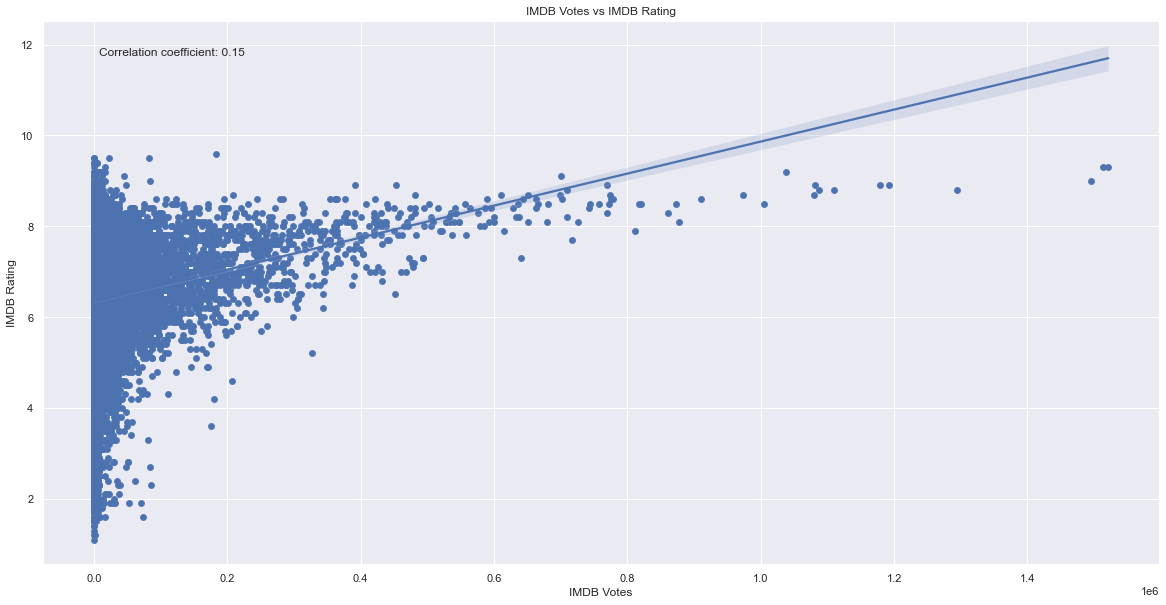

In [150]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x="imdbVotes", y="imdbRating", data=df, ax=ax)
correlation_coefficient = df['imdbVotes'].corr(df['imdbRating'])
sns.regplot(x="imdbVotes", y="imdbRating", data=df, ax=ax)
text = "Correlation coefficient: {:.2f}".format(correlation_coefficient)
ax.text(0.05, 0.95, text, transform=ax.transAxes, verticalalignment='top')
plt.xlabel('IMDB Votes')
plt.ylabel('IMDB Rating')
plt.title('IMDB Votes vs IMDB Rating')
plt.show()

In [151]:
import plotly.express as px

fig = px.scatter(x=df["imdbVotes"],
                 y=df["imdbRating"],
                 hover_data=[df["title"], df["imdbRating"],df["year"]],
                 )

fig.update_layout(
    title="IMDB Votes vs IMDB Rating",
    xaxis_title="IMDB Votes",
    yaxis_title="IMDB Rating",
    font=dict(size=10),
    width=1000,
    height=800
)

fig.show()

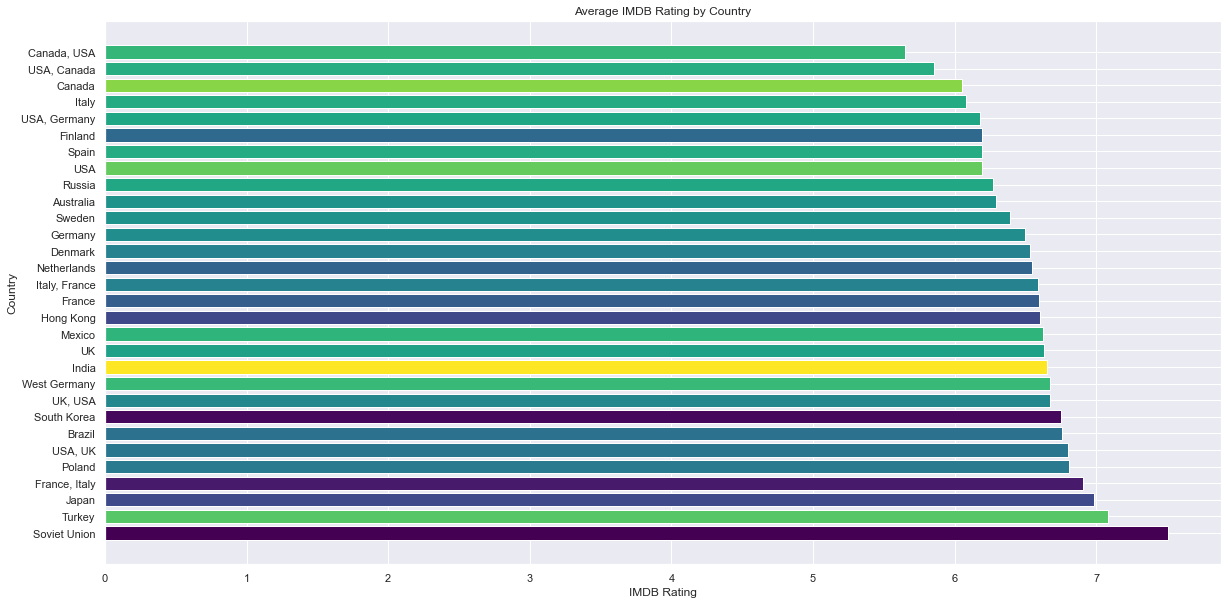

In [152]:
import matplotlib.cm as cm
df_country = df['country'].value_counts().head(30)
top_countries = df_country.index.tolist()
df_top_countries = df[df['country'].isin(top_countries)]
avg_rating = df_top_countries.groupby('country')['imdbRating'].mean().reset_index()
std_dev = df_top_countries.groupby('country')['imdbRating'].std().reset_index()
avg_std = avg_rating.merge(std_dev, on='country')
avg_std = avg_std.sort_values(by='imdbRating_x', ascending=False)
plt.figure(figsize=(20, 10))
cmap = cm.get_cmap('viridis')
normalize = plt.Normalize(vmin=min(avg_std['imdbRating_y']), vmax=max(avg_std['imdbRating_y']))
colors = cmap(normalize(avg_std['imdbRating_y']))
plt.barh(avg_std['country'], avg_std['imdbRating_x'], color=colors)
plt.xlabel('IMDB Rating')
plt.ylabel('Country')
plt.title('Average IMDB Rating by Country')
plt.show()

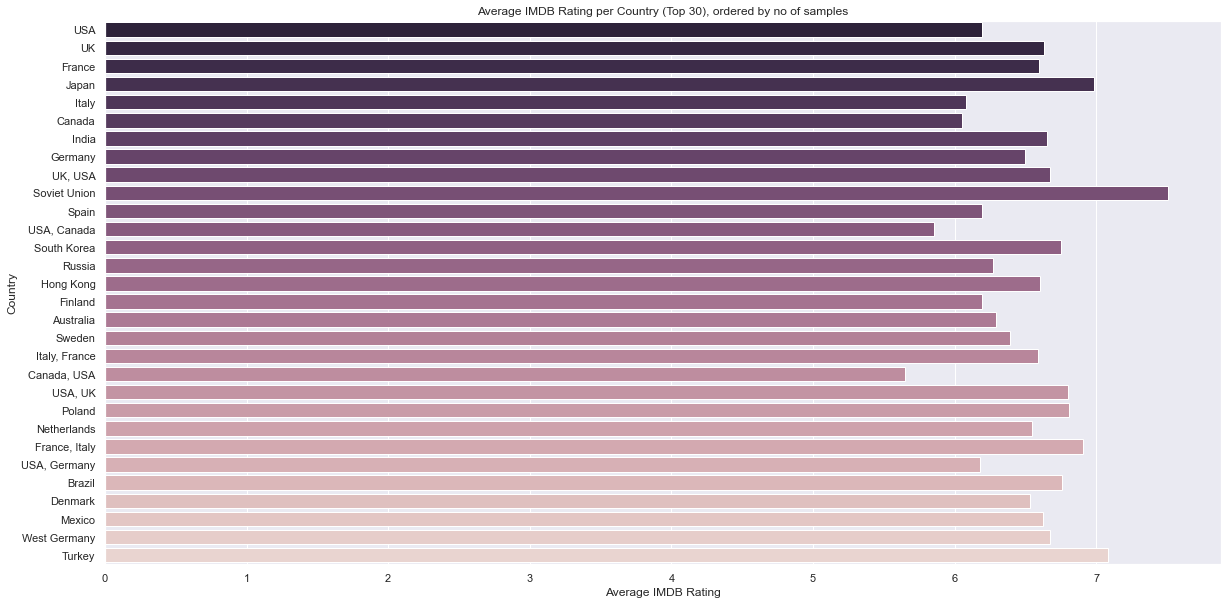

In [153]:
df_country = df['country'].value_counts().head(30)
occurece_df = df_country
top_countries = df_country.index.tolist()
df_top_countries = df[df['country'].isin(top_countries)]
df_country = df_top_countries.groupby('country')['imdbRating'].mean().reset_index()
df_country = df_country.join(occurece_df, on=df_country["country"] , how='left', lsuffix='_left', rsuffix='_right')
df_country.sort_values(by="country_right",inplace=True,ascending=False)
plt.figure(figsize=(20, 10))

sns.barplot(x="imdbRating", y="country_left", data=df_country,palette=reversed(sns.cubehelix_palette(n_colors=len(df_country))))
plt.xlabel("Average IMDB Rating")
plt.ylabel("Country")
plt.title("Average IMDB Rating per Country (Top 30), ordered by no of samples")
plt.show()




In [154]:
df["awards"].value_counts()

1 nomination.                                                       3158
1 win.                                                              2215
1 win & 1 nomination.                                               1241
2 nominations.                                                      1115
2 wins.                                                              727
                                                                    ... 
Won 5 Oscars. Another 18 wins & 12 nominations.                        1
Nominated for 7 Oscars. Another 1 win.                                 1
Nominated for 1 Golden Globe. Another 7 wins & 1 nomination.           1
Won 1 Oscar. Another 14 wins & 6 nominations.                          1
Nominated for 3 Golden Globes. Another 12 wins & 14 nominations.       1
Name: awards, Length: 2901, dtype: int64

In [158]:
import re

def extract_noms_and_wins(string):
    if not isinstance(string, str):
        return 0
    integers = re.findall(r'\d+', string)
    integers = [int(i) for i in integers]
    return sum(integers)

df['nomsandwins']= df['awards'].apply(extract_noms_and_wins)

Text(0.5, 0.93, 'Top Movies by number of Won and Nominated Prices:')

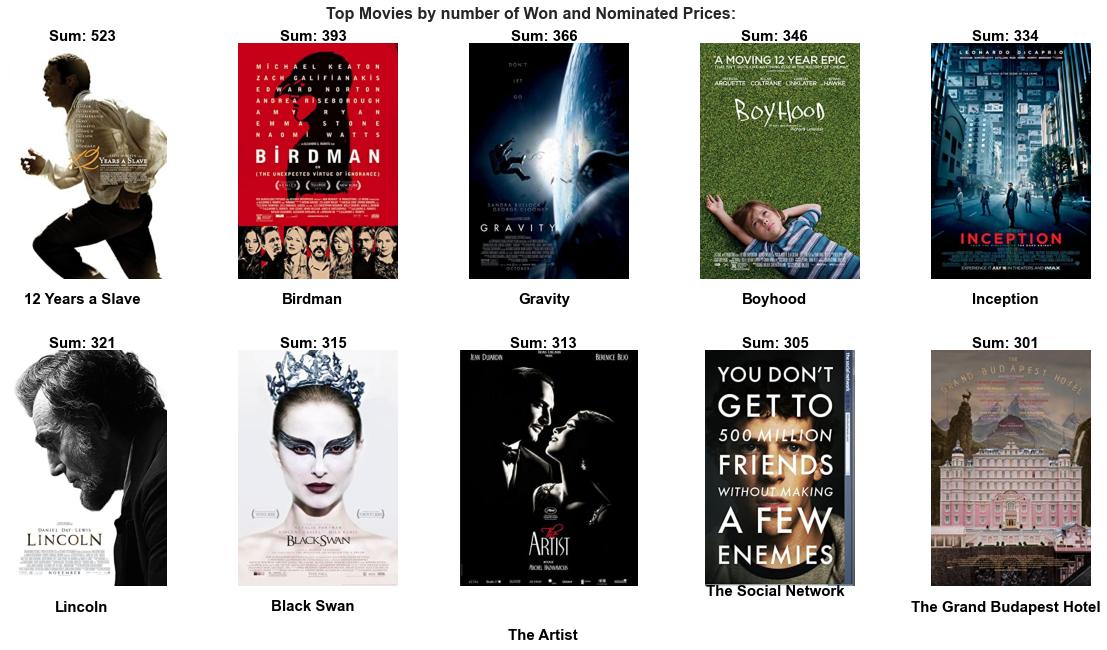

In [233]:
import urllib
df_removed = df.dropna(subset=['poster'])
# Get the top 10 films based on the nomsandwins column
top_10 = df_removed.nlargest(11, 'nomsandwins')
top_10.drop_duplicates(inplace=True, subset=["title"])
# Create a list of the URLs for the top 10 films
poster_urls = top_10['poster'].tolist()

# Download the images and store them as arrays
images = []
for url in poster_urls:
    with urllib.request.urlopen(url) as url:
        image = plt.imread(url, format='jpeg')
        images.append(image)

fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for i, image in enumerate(images):
    ax[i//5, i%5].imshow(image)
    ax[i//5, i%5].axis('off')
   
    ax[i//5, i%5].text(140, -5, "Sum: "+ str(top_10.iloc[i]['nomsandwins']), 
                      ha='center', fontsize=15, color='black', fontweight='bold')
    ax[i//5, i%5].text(140, 490, top_10.iloc[i]['title'].split(":")[0].strip(), 
                      ha='center', fontsize=15, color='black', fontweight='bold')
plt.subplots_adjust(hspace=0.3)
plt.suptitle("Top Movies by number of Won and Nominated Prices:", fontweight='bold', fontsize=16, y=0.93)

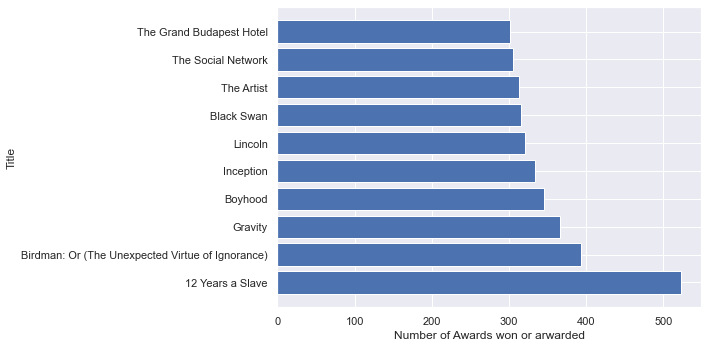

In [242]:
# Create a barplot of the nomsandwins column
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(y=top_10['title'], width=top_10['nomsandwins'])
ax.set_ylabel("Title")
ax.set_xlabel("Number of Awards won or arwarded")
plt.tight_layout()
plt.show()

In [231]:
top_10

imdbID                                             title  year rating  \
38873  2024544                                  12 Years a Slave  2013      R   
41497  2562232  Birdman: Or (The Unexpected Virtue of Ignorance)  2014      R   
35027  1454468                                           Gravity  2013  PG-13   
31922  1065073                                           Boyhood  2014      R   
34494  1375666                                         Inception  2010  PG-13   
27990   443272                                           Lincoln  2012  PG-13   
31074   947798                                        Black Swan  2010      R   
36557  1655442                                        The Artist  2011  PG-13   
33777  1285016                                The Social Network  2010  PG-13   
40203  2278388                          The Grand Budapest Hotel  2014      R   

       runtime                      genre    released  \
38873  134 min  Biography, Drama, History  2013-11-08   
41497  119 min              Comedy, Drama  2014-11-14   
35027   91 min           Sci-Fi, Thriller  2013-10-04   
31922  165 min                      Drama  2014-08-15   
34494  148 min    Action, Mystery, Sci-Fi  2010-07-16   
27990  150 min  Biography, Drama, History  2012-11-16   
31074  108 min            Drama, Thriller  2010-12-17   
36557  100 min     Comedy, Drama, Romance  2012-01-20   
33777  120 min           Biography, Drama  2010-10-01   
40203   99 min   Adventure, Comedy, Drama  2014-03-28   

                          director  \
38873                Steve McQueen   
41497  Alejandro Gonz�lez I��rritu   
35027               Alfonso Cuar�n   
31922            Richard Linklater   
34494            Christopher Nolan   
27990             Steven Spielberg   
31074             Darren Aronofsky   
36557          Michel Hazanavicius   
33777                David Fincher   
40203                 Wes Anderson   

                                                  writer  \
38873  John Ridley (screenplay), Solomon Northup (bas...   
41497  Alejandro Gonz�lez I��rritu, Nicol�s Giacobone...   
35027                       Alfonso Cuar�n, Jon�s Cuar�n   
31922                                  Richard Linklater   
34494                                  Christopher Nolan   
27990  Tony Kushner (screenplay), Doris Kearns Goodwi...   
31074  Mark Heyman (screenplay), Andres Heinz (screen...   
36557                                Michel Hazanavicius   
33777      Aaron Sorkin (screenplay), Ben Mezrich (book)   
40203  Stefan Zweig (inspired by the writings of), We...   

                                                    cast  ...  imdbVotes  \
38873  Chiwetel Ejiofor, Dwight Henry, Dickie Gravois...  ...   363143.0   
41497  Michael Keaton, Emma Stone, Kenny Chin, Jamahl...  ...   304963.0   
35027  Sandra Bullock, George Clooney, Ed Harris, Ort...  ...   519106.0   
31922  Ellar Coltrane, Patricia Arquette, Elijah Smit...  ...   226285.0   
34494  Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...  ...  1294646.0   
27990  Daniel Day-Lewis, Sally Field, David Strathair...  ...   182438.0   
31074  Natalie Portman, Mila Kunis, Vincent Cassel, B...  ...   505565.0   
36557  Jean Dujardin, B�r�nice Bejo, John Goodman, Ja...  ...   175000.0   
33777  Jesse Eisenberg, Rooney Mara, Bryan Barter, Du...  ...   431315.0   
40203  Ralph Fiennes, F. Murray Abraham, Mathieu Amal...  ...   382211.0   

                                                  poster  \
38873  https://m.media-amazon.com/images/M/MV5BMjExMT...   
41497  https://m.media-amazon.com/images/M/MV5BODAzND...   
35027  https://m.media-amazon.com/images/M/MV5BNjE5Mz...   
31922  https://m.media-amazon.com/images/M/MV5BMTYzND...   
34494  https://m.media-amazon.com/images/M/MV5BMjAxMz...   
27990  https://m.media-amazon.com/images/M/MV5BMTQzNz...   
31074  https://m.media-amazon.com/images/M/MV5BNzY2Nz...   
36557  https://m.media-amazon.com/images/M/MV5BMzk0Nz...   
33777  https://m.media-amazon.c

In [228]:
top_10["title"][33777]

'The Social Network'